<a href="https://colab.research.google.com/github/mkgreen/Principal-Component-Analysis-with-Zillow/blob/main/PCA_project_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries and Loading Data**

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white',color_codes=True)

In [2]:
dataset = pd.read_csv("/content/train.csv")

In [3]:
print(f"The dataset contains {dataset.shape[0]} rows and {dataset.shape[1]} columns.")

The dataset contains 1460 rows and 81 columns.


In [5]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# checking for missing data
features_na = [features for features in dataset.columns if dataset[features].isnull().sum() > 0]
print("Missing Value Counts + Percentages")
print("-"*34)
for feature in features_na:
  print(f"* {feature}: {dataset[feature].isna().sum()} values, {np.round(dataset[feature].isnull().mean(),2)*100}% of entries")
else:
  print()
  print("no other missing values found in dataset")

Missing Value Counts + Percentages
----------------------------------
* LotFrontage: 259 values, 18.0% of entries
* Alley: 1369 values, 94.0% of entries
* MasVnrType: 8 values, 1.0% of entries
* MasVnrArea: 8 values, 1.0% of entries
* BsmtQual: 37 values, 3.0% of entries
* BsmtCond: 37 values, 3.0% of entries
* BsmtExposure: 38 values, 3.0% of entries
* BsmtFinType1: 37 values, 3.0% of entries
* BsmtFinType2: 38 values, 3.0% of entries
* Electrical: 1 values, 0.0% of entries
* FireplaceQu: 690 values, 47.0% of entries
* GarageType: 81 values, 6.0% of entries
* GarageYrBlt: 81 values, 6.0% of entries
* GarageFinish: 81 values, 6.0% of entries
* GarageQual: 81 values, 6.0% of entries
* GarageCond: 81 values, 6.0% of entries
* PoolQC: 1453 values, 100.0% of entries
* Fence: 1179 values, 81.0% of entries
* MiscFeature: 1406 values, 96.0% of entries

no other missing values found in dataset


In [8]:
df = dataset.copy()

In [9]:
# droping columns missing over 40% of data
df.drop(['Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'], axis=1, inplace=True)

In [10]:
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset contains 1460 rows and 76 columns.


In [11]:
miss_val = df.isna().sum()

print("Missing Value Count by Feature:")
print("-"*31)
print(miss_val)

miss_val_count = miss_val.sum()

if miss_val_count == 0:
  print()
  print("There are no missing values in the dataset.")
else:
  print()
  print(f"There are {miss_val_count} missing values in this dataset.")

Missing Value Count by Feature:
-------------------------------
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

There are 868 missing values in this dataset.


In [13]:
#Checking for missing values
miss_val = df.isna().sum()
miss_val[miss_val>0].sort_values(ascending=False)

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

In [14]:
col_name=df.columns
print("Unique Value Counts by Feature")
print("="*30)
for i in col_name:
  print(i, ':',df[i].nunique())

Unique Value Counts by Feature
Id : 1460
MSSubClass : 15
MSZoning : 5
LotFrontage : 110
LotArea : 1073
Street : 2
LotShape : 4
LandContour : 4
Utilities : 2
LotConfig : 5
LandSlope : 3
Neighborhood : 25
Condition1 : 9
Condition2 : 8
BldgType : 5
HouseStyle : 8
OverallQual : 10
OverallCond : 9
YearBuilt : 112
YearRemodAdd : 61
RoofStyle : 6
RoofMatl : 8
Exterior1st : 15
Exterior2nd : 16
MasVnrType : 4
MasVnrArea : 327
ExterQual : 4
ExterCond : 5
Foundation : 6
BsmtQual : 4
BsmtCond : 4
BsmtExposure : 4
BsmtFinType1 : 6
BsmtFinSF1 : 637
BsmtFinType2 : 6
BsmtFinSF2 : 144
BsmtUnfSF : 780
TotalBsmtSF : 721
Heating : 6
HeatingQC : 5
CentralAir : 2
Electrical : 5
1stFlrSF : 753
2ndFlrSF : 417
LowQualFinSF : 24
GrLivArea : 861
BsmtFullBath : 4
BsmtHalfBath : 3
FullBath : 4
HalfBath : 3
BedroomAbvGr : 8
KitchenAbvGr : 4
KitchenQual : 4
TotRmsAbvGrd : 12
Functional : 7
Fireplaces : 4
GarageType : 6
GarageYrBlt : 97
GarageFinish : 3
GarageCars : 5
GarageArea : 441
GarageQual : 5
GarageCond : 5
Pa

In [15]:
#Filtering numerical data
df1 = df.select_dtypes(include=['float64','int64'])
df1.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [17]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


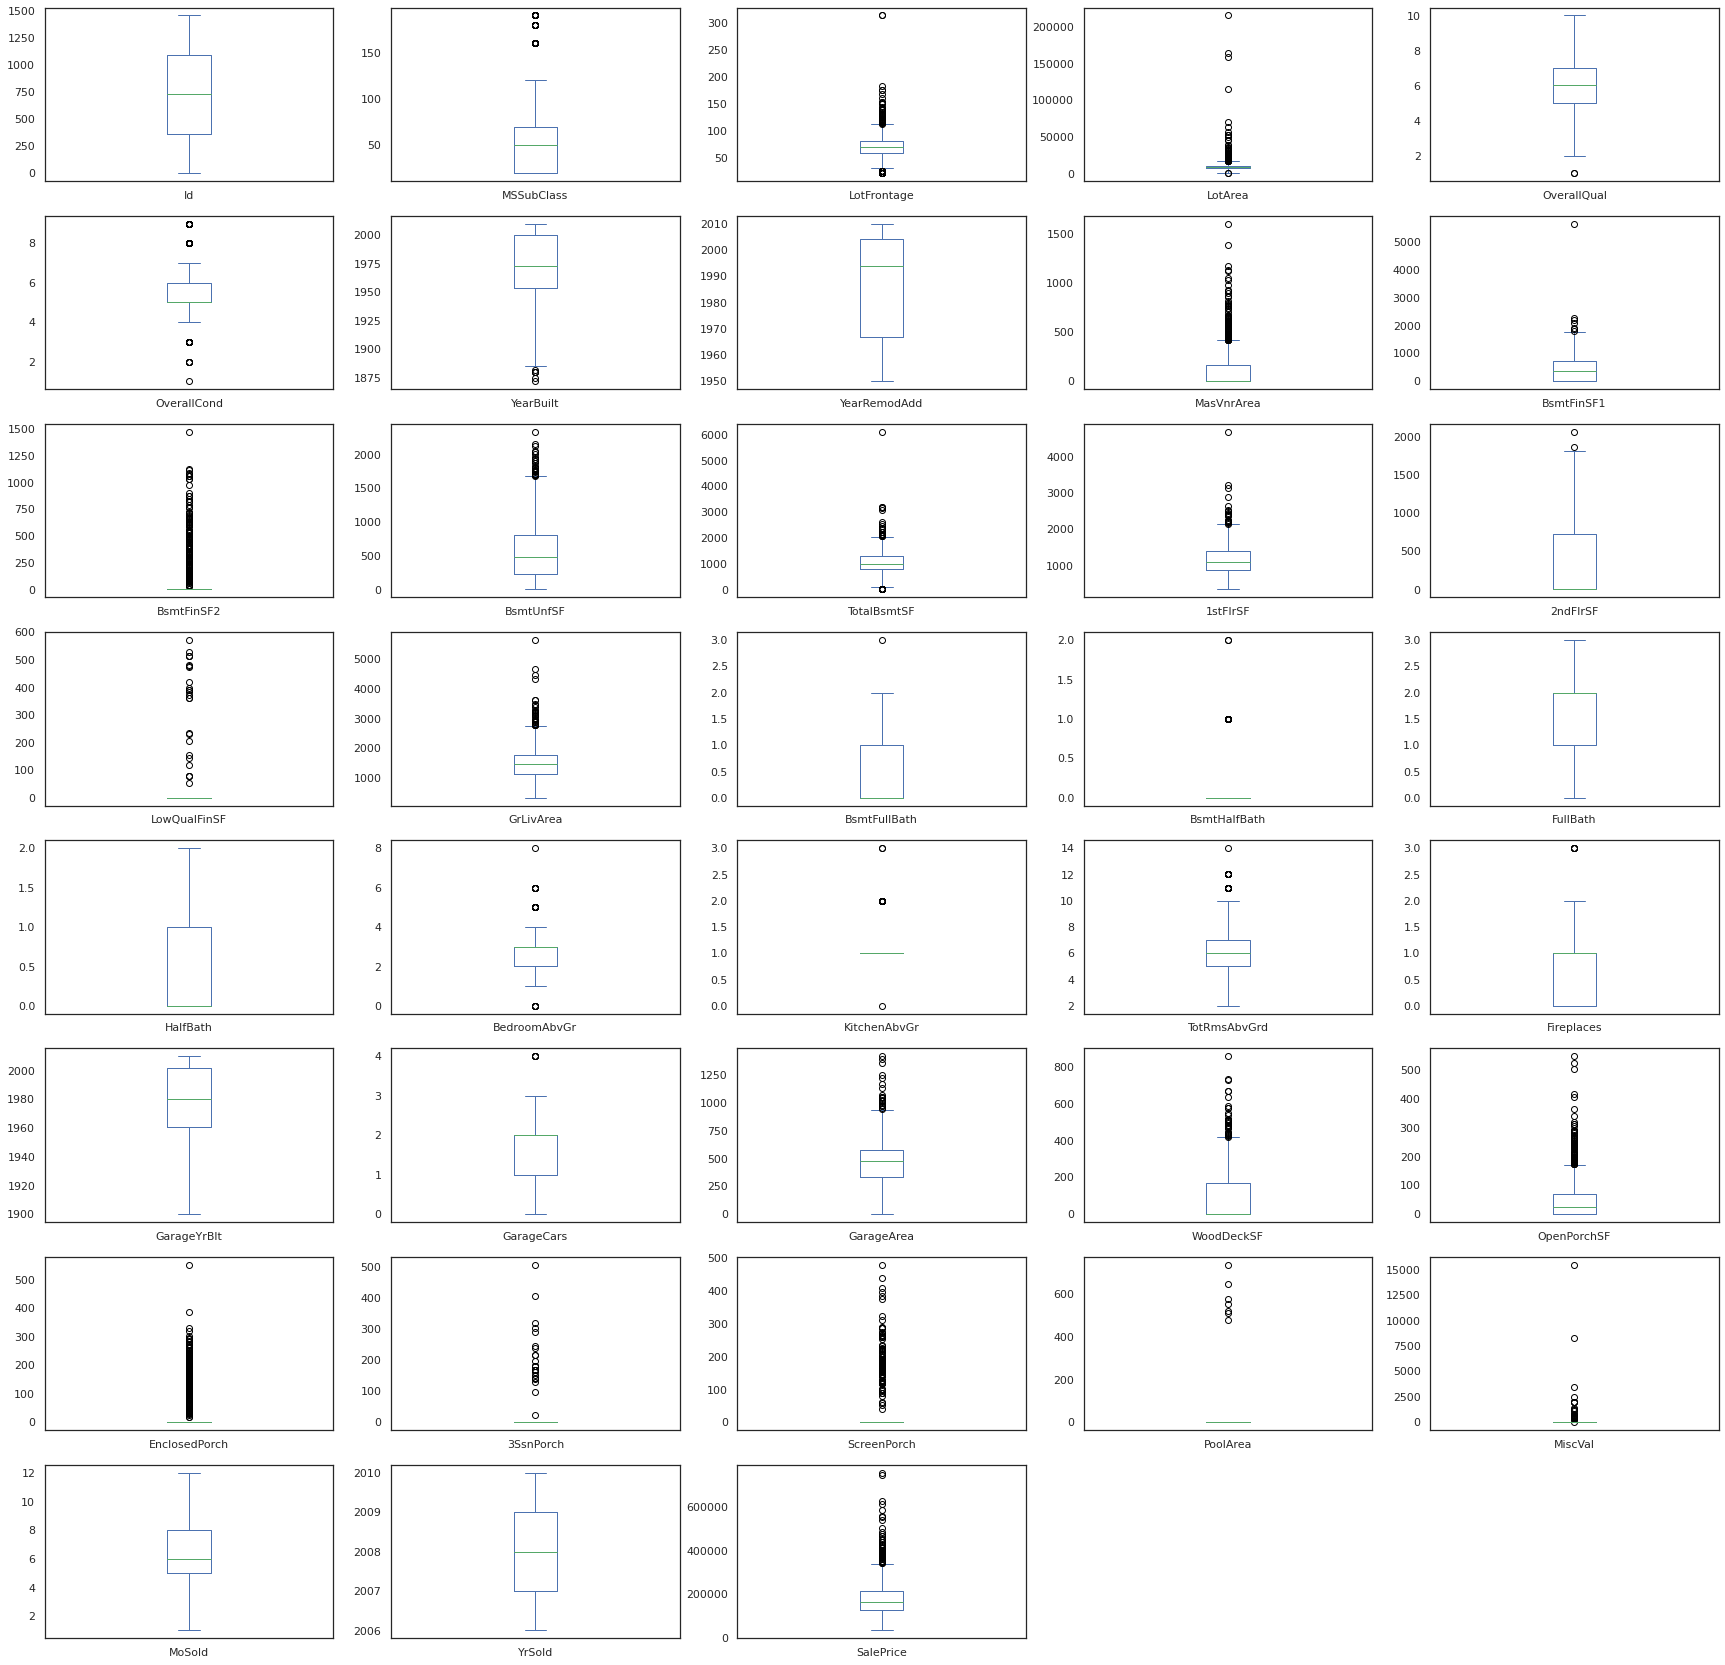

In [18]:
#Box plot
df1.plot(kind="box", subplots=True, layout=(8,5), figsize=(30,30))
plt.show()

Method chosen to remove outliers:
- Interquartile range (IQR)

**Outliers = Observations > Q3 + 1.5*IQR  or  Q1 – 1.5 *IQR**

In [19]:
for col in df1:
  df1[col] = df1[col].astype(float)

In [20]:
for col in df1:
  Q1 = np.percentile(df1[col], 25, interpolation = 'midpoint')
  Q2 = np.percentile(df1[col], 50, interpolation = 'midpoint')
  Q3 = np.percentile(df1[col], 75, interpolation = 'midpoint')
  IQR = Q3 - Q1
  low_lim = Q1 - 1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  df1[col]= df1[col][df1[col]< up_lim]
  df1[col]= df1[col][df1[col]> low_lim]

In [21]:
df1.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1357.000000,0.0,1392.000000,1437.000000,1335.000000,1451.000000,1460.000000,0.0,1453.000000,...,1428.000000,1381.000000,0.0,0.0,0.0,0.0,0.0,1460.000000,1460.000000,1399.000000
mean,730.500000,48.260870,NaN,9266.936782,6.066110,5.453184,1971.834597,1984.865753,NaN,433.538885,...,84.452381,35.315713,NaN,NaN,NaN,NaN,NaN,6.321918,2007.815753,170237.127234
std,421.610009,29.206513,NaN,3202.406667,1.296212,0.800498,29.421577,20.645407,NaN,424.119726,...,106.980340,43.954063,NaN,NaN,NaN,NaN,NaN,2.703626,1.328095,59230.130817
min,1.000000,20.000000,NaN,1477.000000,3.000000,4.000000,1890.000000,1950.000000,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7420.000000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,5.000000,2007.000000,129000.000000
50%,730.500000,50.000000,NaN,9274.000000,6.000000,5.000000,1973.000000,1994.000000,NaN,380.000000,...,0.000000,20.000000,NaN,NaN,NaN,NaN,NaN,6.000000,2008.000000,159500.000000
75%,1095.250000,60.000000,NaN,11229.750000,7.000000,6.000000,2001.000000,2004.000000,NaN,705.000000,...,164.250000,60.000000,NaN,NaN,NaN,NaN,NaN,8.000000,2009.000000,203500.000000
max,1460.000000,120.000000,NaN,17671.000000,9.000000,7.000000,2010.000000,2010.000000,NaN,1767.000000,...,418.000000,169.000000,NaN,NaN,NaN,NaN,NaN,12.000000,2010.000000,340000.000000


In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   float64
 1   MSSubClass     1357 non-null   float64
 2   LotFrontage    0 non-null      float64
 3   LotArea        1392 non-null   float64
 4   OverallQual    1437 non-null   float64
 5   OverallCond    1335 non-null   float64
 6   YearBuilt      1451 non-null   float64
 7   YearRemodAdd   1460 non-null   float64
 8   MasVnrArea     0 non-null      float64
 9   BsmtFinSF1     1453 non-null   float64
 10  BsmtFinSF2     0 non-null      float64
 11  BsmtUnfSF      1431 non-null   float64
 12  TotalBsmtSF    1399 non-null   float64
 13  1stFlrSF       1440 non-null   float64
 14  2ndFlrSF       1458 non-null   float64
 15  LowQualFinSF   0 non-null      float64
 16  GrLivArea      1429 non-null   float64
 17  BsmtFullBath   1459 non-null   float64
 18  BsmtHalf

In [23]:
# checking for missing data
features_na = [features for features in df1.columns if df1[features].isnull().sum() > 0]
print("Missing Value Counts + Percentages")
print("-"*34)
for feature in features_na:
  print(f"* {feature}: {df1[feature].isna().sum()} values, {np.round(df1[feature].isnull().mean(),2)*100}% of entries")
else:
  print()
  print("no other missing values found in dataset")

Missing Value Counts + Percentages
----------------------------------
* MSSubClass: 103 values, 7.000000000000001% of entries
* LotFrontage: 1460 values, 100.0% of entries
* LotArea: 68 values, 5.0% of entries
* OverallQual: 23 values, 2.0% of entries
* OverallCond: 125 values, 9.0% of entries
* YearBuilt: 9 values, 1.0% of entries
* MasVnrArea: 1460 values, 100.0% of entries
* BsmtFinSF1: 7 values, 0.0% of entries
* BsmtFinSF2: 1460 values, 100.0% of entries
* BsmtUnfSF: 29 values, 2.0% of entries
* TotalBsmtSF: 61 values, 4.0% of entries
* 1stFlrSF: 20 values, 1.0% of entries
* 2ndFlrSF: 2 values, 0.0% of entries
* LowQualFinSF: 1460 values, 100.0% of entries
* GrLivArea: 31 values, 2.0% of entries
* BsmtFullBath: 1 values, 0.0% of entries
* BsmtHalfBath: 1460 values, 100.0% of entries
* BedroomAbvGr: 35 values, 2.0% of entries
* KitchenAbvGr: 1460 values, 100.0% of entries
* TotRmsAbvGrd: 78 values, 5.0% of entries
* Fireplaces: 5 values, 0.0% of entries
* GarageYrBlt: 1460 values, 

# Ask what went wrong above ^^^^

Missing Value Counts + Percentages
----------------------------------

* LotFrontage: 1460 values, 100.0% of entries

* MasVnrArea: 1460 values, 100.0% of entries

* BsmtFinSF2: 1460 values, 100.0% of entries

* LowQualFinSF: 1460 values, 100.0% of entries

* BsmtHalfBath: 1460 values, 100.0% of entries

* KitchenAbvGr: 1460 values, 100.0% of entries

* GarageYrBlt: 1460 values, 100.0% of entries

* EnclosedPorch: 1460 values, 100.0% of entries
* 3SsnPorch: 1460 values, 100.0% of entries
* ScreenPorch: 1460 values, 100.0% of entries
* PoolArea: 1460 values, 100.0% of entries
* MiscVal: 1460 values, 100.0% of entries


In [14]:
#QUESTION: showing errors for float values
for col in df1:
  print(f"For {col}:")
  Q1 = np.percentile(df1[col], 25, interpolation = 'midpoint')
  Q2 = np.percentile(df1[col], 50, interpolation = 'midpoint')
  Q3 = np.percentile(df1[col], 75, interpolation = 'midpoint')
  print(f'Q1 = {Q1}')
  print(f'Q2 = {Q2}')
  print(f'Q3 = {Q3}')
  IQR = Q3 - Q1
  print(f'IQR = {IQR}')
  low_lim = Q1 -1.5 * IQR
  up_lim = Q3 + 1.5 * IQR
  print(f'low limit: {low_lim}')
  print(f'upper limit: {up_lim}')
  df1[col]= df1[col][df1[col]< up_lim]
  df1[col]= df1[col][df1[col]> low_lim]
  print("-"*30)

For Id:
Q1 = 365.5
Q2 = 730.5
Q3 = 1095.5
IQR = 730.0
low limit: -729.5
upper limit: 2190.5
------------------------------
For MSSubClass:
Q1 = 20.0
Q2 = 50.0
Q3 = 70.0
IQR = 50.0
low limit: -55.0
upper limit: 145.0
------------------------------
For LotFrontage:
Q1 = nan
Q2 = nan
Q3 = nan
IQR = nan
low limit: nan
upper limit: nan
------------------------------
For LotArea:
Q1 = 7549.0
Q2 = 9478.5
Q3 = 11603.0
IQR = 4054.0
low limit: 1468.0
upper limit: 17684.0
------------------------------
For OverallQual:
Q1 = 5.0
Q2 = 6.0
Q3 = 7.0
IQR = 2.0
low limit: 2.0
upper limit: 10.0
------------------------------
For OverallCond:
Q1 = 5.0
Q2 = 5.0
Q3 = 6.0
IQR = 1.0
low limit: 3.5
upper limit: 7.5
------------------------------
For YearBuilt:
Q1 = 1954.0
Q2 = 1973.0
Q3 = 2000.0
IQR = 46.0
low limit: 1885.0
upper limit: 2069.0
------------------------------
For YearRemodAdd:
Q1 = 1967.0
Q2 = 1994.0
Q3 = 2004.0
IQR = 37.0
low limit: 1911.5
upper limit: 2059.5
------------------------------
For

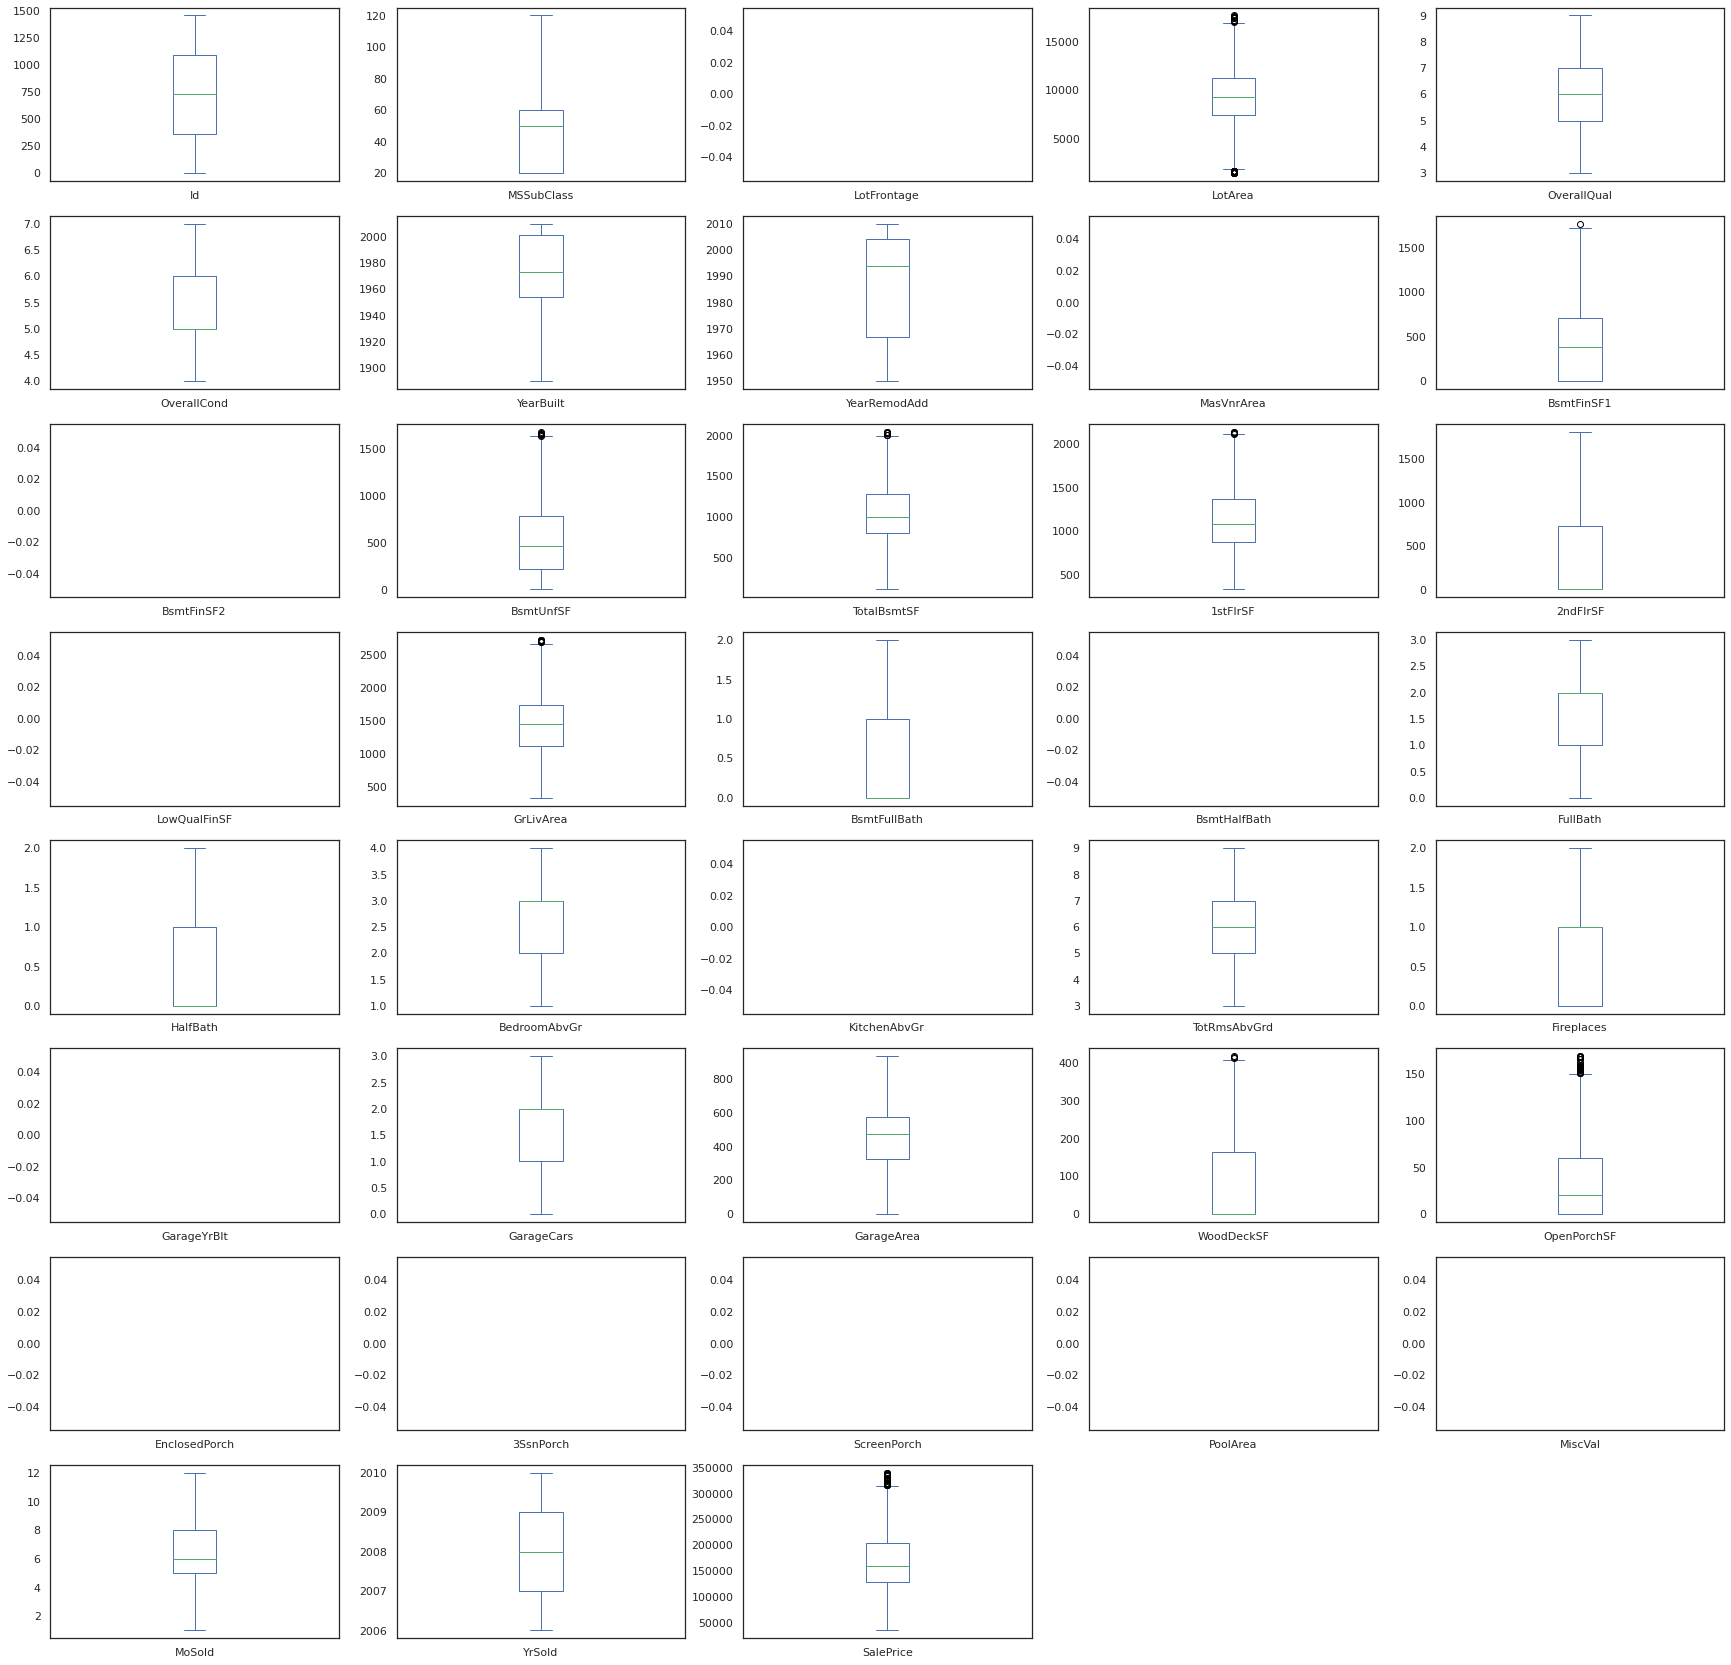

In [24]:
#Box plot
df1.plot(kind="box", subplots=True, layout=(8,5), figsize=(30,30))
plt.show()

# RESTART FROM HERE
# * * * * * * * * * * * * * * *


In [25]:
#Checking for missing values
miss_val = df1.isna().sum()
miss_val[miss_val>0].sort_values(ascending=False)

BsmtHalfBath     1460
LowQualFinSF     1460
MiscVal          1460
PoolArea         1460
ScreenPorch      1460
MasVnrArea       1460
3SsnPorch        1460
BsmtFinSF2       1460
EnclosedPorch    1460
GarageYrBlt      1460
KitchenAbvGr     1460
LotFrontage      1460
OverallCond       125
MSSubClass        103
OpenPorchSF        79
TotRmsAbvGrd       78
LotArea            68
SalePrice          61
TotalBsmtSF        61
BedroomAbvGr       35
WoodDeckSF         32
GrLivArea          31
BsmtUnfSF          29
OverallQual        23
GarageArea         21
1stFlrSF           20
YearBuilt           9
BsmtFinSF1          7
GarageCars          5
Fireplaces          5
2ndFlrSF            2
BsmtFullBath        1
dtype: int64